<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/fastai/blob/master/dog_cat_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model detects whether a person is wearing a mask or notpip 

In [ ]:
!pip install fastai==2.0.12

In [ ]:
import fastai
fastai.__version__

'2.0.12'

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.data.all import *
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/dataset/IMAGES.zip'

Archive:  /content/drive/My Drive/dataset/IMAGES.zip
replace IMAGES/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
category = 'cat','dog'
path = '/content/IMAGES'
print(path)

/content/IMAGES


In [ ]:
block = DataBlock(
                  blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct=0.2, seed=42),
                  get_y = parent_label,
                  item_tfms=RandomResizedCrop(128, min_scale=0.5), 
                  batch_tfms=aug_transforms()
)

In [ ]:
dataloader = block.dataloaders(path,batch_size = 8)

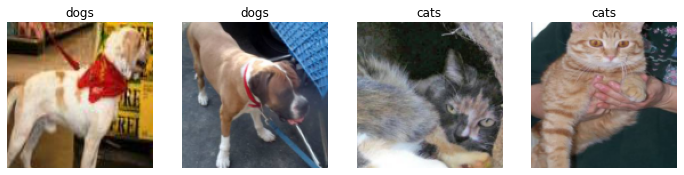

In [ ]:
dataloader.valid.show_batch(max_n=4, nrows=1)

 Creating our model and fine tuning it for the required number of epochs

In [ ]:
model = cnn_learner(dataloader, resnet50, metrics=error_rate)
model.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.884283,0.072490,0.000000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.392737,0.057380,0.000000,00:01
1,0.740365,0.130443,0.076923,00:00
2,0.663040,0.176604,0.076923,00:00
3,0.509978,0.271391,0.076923,00:00
4,0.536594,0.150069,0.076923,00:00
5,0.423822,0.378204,0.076923,00:00
6,0.344036,0.489920,0.076923,00:00
7,0.331271,0.541178,0.076923,00:00
8,0.357851,0.678281,0.153846,00:00
9,0.322074,0.889001,0.153846,00:00


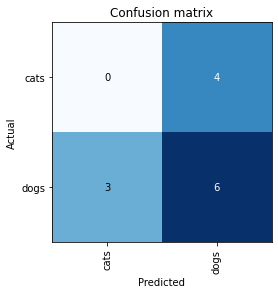

In [ ]:
conf = ClassificationInterpretation.from_learner(model)
conf.plot_confusion_matrix()

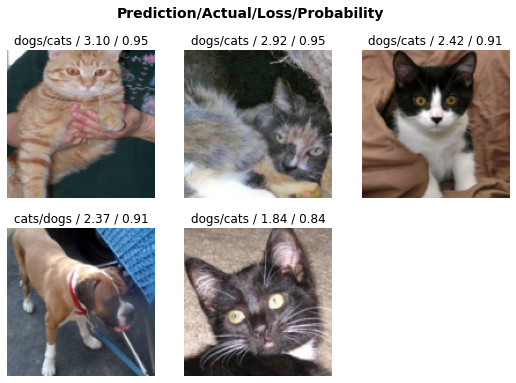

In [ ]:
conf.plot_top_losses(5, nrows=2)

In [ ]:
model.predict('dog.4002.jpg')

('dogs', tensor(1), tensor([3.1777e-07, 1.0000e+00]))

In [ ]:
#model.dataloader.vocab